In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Carga y limpieza de los datos

## Cargando los datos

In [ ]:
BASE_PATH = "/content/drive/MyDrive/EspecialidadDataScience/NarracionHistorias/Datos"

In [ ]:
movies = pd.read_csv(BASE_PATH + '/rotten_tomatoes_movies.csv')
reviews = pd.read_csv(BASE_PATH + '/rotten_tomatoes_critic_reviews.csv')

In [ ]:
movies.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [ ]:
reviews.describe()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
count,1130017,1111488,1130017,1130017,1130017,824081,1130017,1064211
unique,17712,11108,2,2230,2,814,8015,949181
top,m/star_wars_the_rise_of_skywalker,Emanuel Levy,False,New York Times,Fresh,3/5,2000-01-01,Parental Content Review
freq,992,8173,841481,13293,720210,90273,48019,267


## Checando duplicados

In [ ]:
np.sum(movies.duplicated())

0

In [ ]:
np.sum(reviews.duplicated())

119471

In [ ]:
reviews = reviews.drop_duplicates()
np.sum(reviews.duplicated())

0

## Checando valores nulos

In [ ]:
movies.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

Solo nos intersan las películas que cuentan con un rating, ya que es la variable que será usada para medir la disparidad. Por esta razón, eliminamos los registros con valores nulos en `tomatometer_rating` o `audience_rating`.

In [ ]:
movies = movies.dropna(subset=["tomatometer_rating", "audience_rating"])

In [ ]:
reviews.isnull().sum()

rotten_tomatoes_link         0
critic_name              16454
top_critic                   0
publisher_name               0
review_type                  0
review_score            273605
review_date                  0
review_content           58526
dtype: int64

Para este análisis, solo nos iteresan las reviews que tienen contenido escrito.

In [ ]:
reviews = reviews.dropna(subset=['review_content'])

# 1. Justificación del problema

In [ ]:
movies.tomatometer_status.value_counts()

tomatometer_status
Rotten             7491
Fresh              6658
Certified-Fresh    3258
Name: count, dtype: int64

In [ ]:
movies.audience_status.value_counts()

audience_status
Upright    9385
Spilled    7870
Name: count, dtype: int64

Filtramos las películas que fueron Rotten y Upright al mismo tiempo

In [ ]:
appealing_to_public = movies[(movies.tomatometer_status == 'Rotten') & (movies.audience_status == 'Upright')]

In [ ]:
len(appealing_to_public)

1881

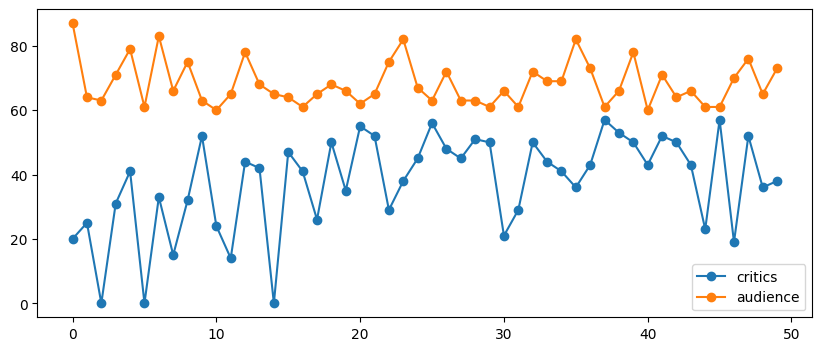

In [ ]:
n = 50
plt.figure(figsize=(10, 4))
plt.plot(appealing_to_public.tomatometer_rating[:n].values, marker='o', label='critics')
plt.plot(appealing_to_public.audience_rating[:n].values, marker='o', label='audience')
plt.legend()
plt.show()

In [ ]:
appealing_to_critics = movies[(movies.tomatometer_status == 'Certified-Fresh') & (movies.audience_status == 'Spilled')]

In [ ]:
len(appealing_to_critics)

347

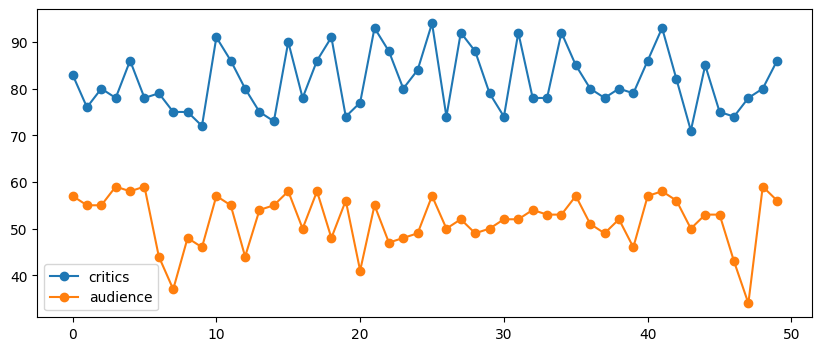

In [ ]:
n = 50
plt.figure(figsize=(10, 4))
plt.plot(appealing_to_critics.tomatometer_rating[:n].values, marker='o', label='critics')
plt.plot(appealing_to_critics.audience_rating[:n].values, marker='o', label='audience')
plt.legend()
plt.show()

# 3. EDA

## 3.1 Distribuciones

<Axes: xlabel='tomatometer_rating', ylabel='Count'>

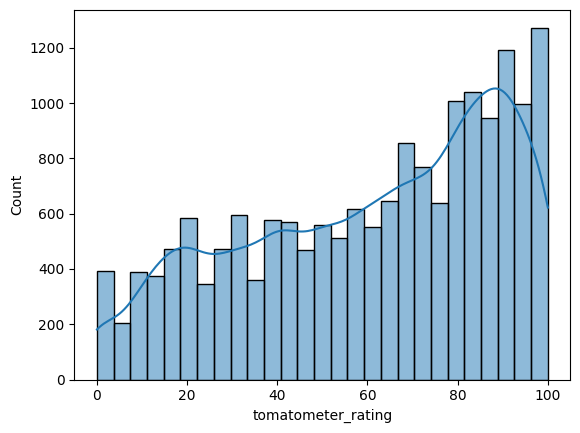

In [ ]:
sns.histplot(movies, x='tomatometer_rating', kde=True)

<Axes: xlabel='audience_rating', ylabel='Count'>

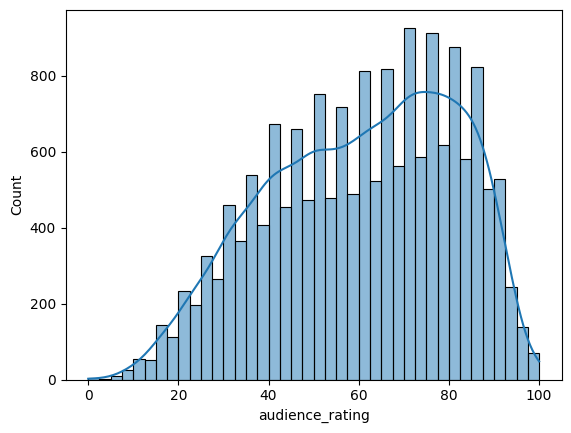

In [ ]:
sns.histplot(movies, x='audience_rating', kde=True)

count    17407.000000
mean        16.898834
std         13.444630
min          0.000000
25%          6.500000
50%         14.000000
75%         24.000000
max         95.000000
dtype: float64

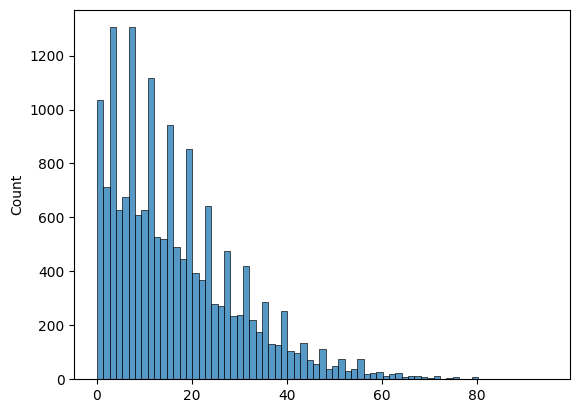

In [ ]:
score_diff = np.abs(movies.tomatometer_rating - movies.audience_rating)
sns.histplot(score_diff)
score_diff.describe()

In [ ]:
score_diff.describe()

count    17407.000000
mean        16.898834
std         13.444630
min          0.000000
25%          6.500000
50%         14.000000
75%         24.000000
max         95.000000
dtype: float64

Filtrando el Q2

In [ ]:
f_score_diff = score_diff[(score_diff > 14)]

<Axes: ylabel='Count'>

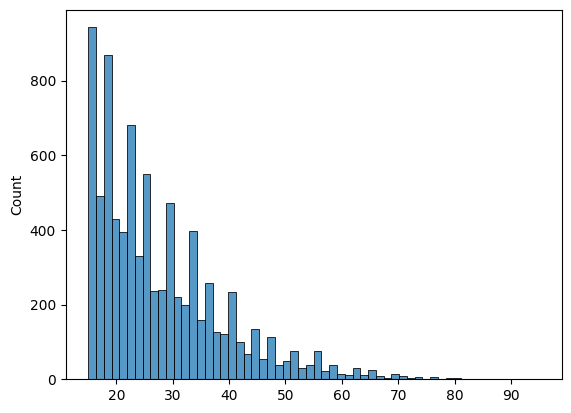

In [ ]:
sns.histplot(f_score_diff)

In [ ]:
f_movies = movies.loc[f_score_diff.index]

<Axes: ylabel='Count'>

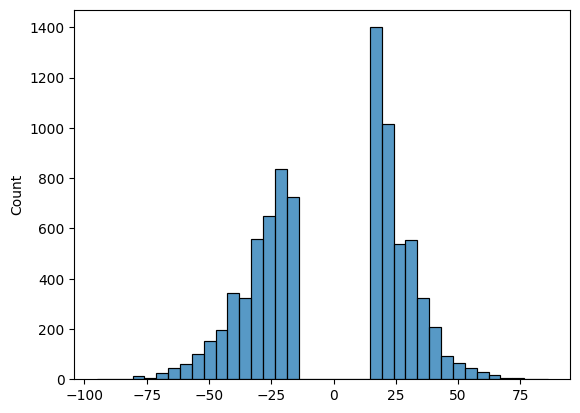

In [ ]:
sns.histplot(f_movies.tomatometer_rating - f_movies.audience_rating)

In [ ]:
print("Cantidad de películas favorecidas por la audiencia:", np.sum((f_movies.tomatometer_rating - f_movies.audience_rating) < 0))

Cantidad de películas favorecidas por la audiencia: 4041


In [ ]:
print("Cantidad de películas favorecidas por la crítica:", np.sum((f_movies.tomatometer_rating - f_movies.audience_rating) > 0))

Cantidad de películas favorecidas por la crítica: 4306


## 3.2 Correlaciones

In [ ]:
movies['diferencia_calificaciones'] = movies['tomatometer_rating'] - movies['audience_rating']

In [ ]:
from scipy.stats import pearsonr

In [ ]:
color_1 = '#FA3209'
color_2 = '#6610F2'
color_3 = '#008260'
color_1_2 = '#fc9883'
color_2_2 = '#b287f8'

Calcular la correlación entre la duración de la película y la diferencia en las calificaciones

In [ ]:
movies_clean = movies.dropna(subset=['runtime', 'diferencia_calificaciones'])


correlation, p_value = pearsonr(movies_clean['runtime'], movies_clean['diferencia_calificaciones'])
print("Correlación entre duración y diferencia de calificaciones:", correlation)
print("Valor p:", p_value)

Correlación entre duración y diferencia de calificaciones: -0.09432300148932757
Valor p: 3.115158239822012e-35


Visualizar la matriz de correlación con un mapa de calor

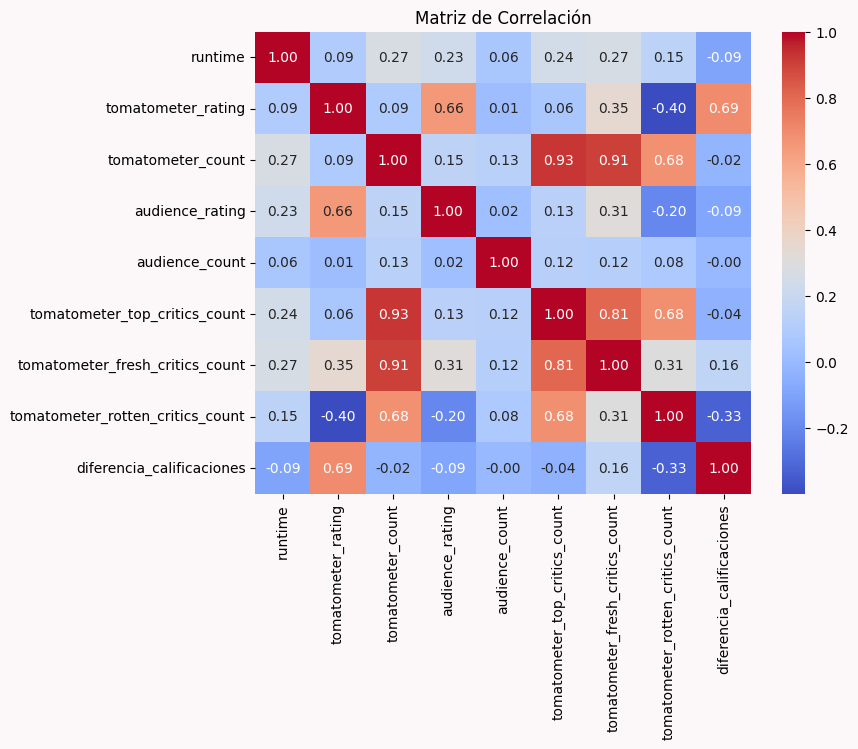

In [ ]:
movies_numeric = movies_clean.select_dtypes(include=['number'])
correlation_matrix = movies_numeric.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.gcf().patch.set_facecolor('#FCF7F8')
plt.show()


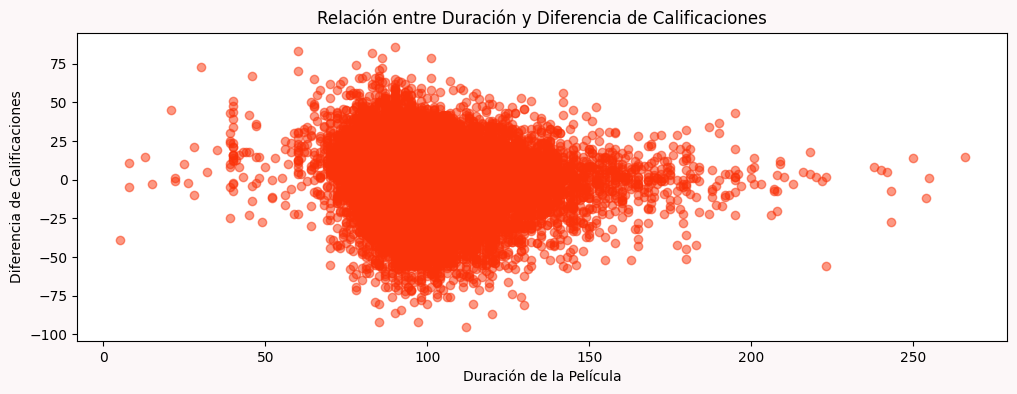

In [ ]:
plt.figure(figsize=(12, 4))
plt.scatter(movies_numeric['runtime'], movies_numeric['diferencia_calificaciones'], alpha=0.5, color=color_1)
plt.title("Relación entre Duración y Diferencia de Calificaciones")
plt.xlabel("Duración de la Película")
plt.ylabel("Diferencia de Calificaciones")
plt.grid(False)
plt.gcf().patch.set_facecolor('#FCF7F8')
plt.show()

Relación entre genero y calificaciones

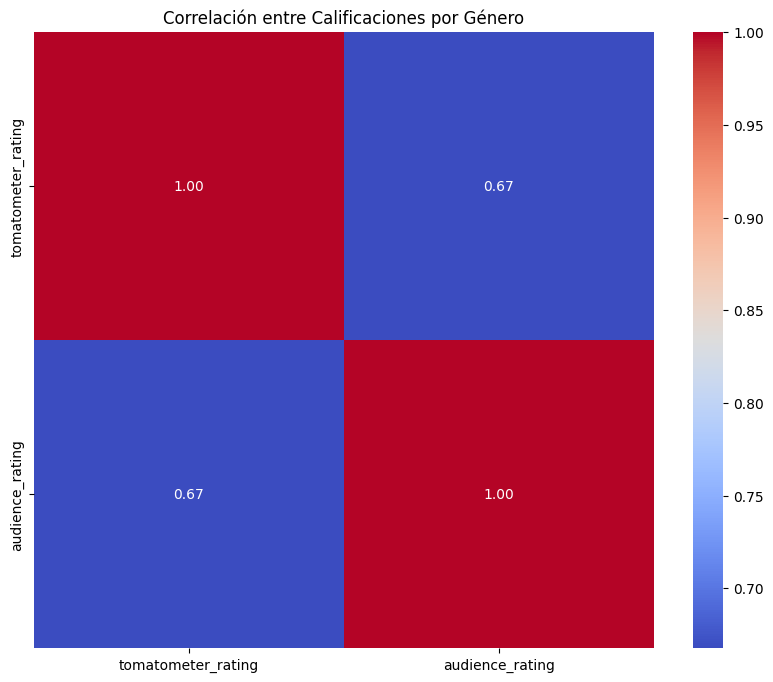

In [ ]:
genre_ratings = movies.groupby('genres').agg({'tomatometer_rating': 'mean', 'audience_rating': 'mean'})
genre_correlation = genre_ratings.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(genre_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre Calificaciones por Género")
plt.show()

Correlación entre Calificaciones y Director y entre Calificaciones y Actores

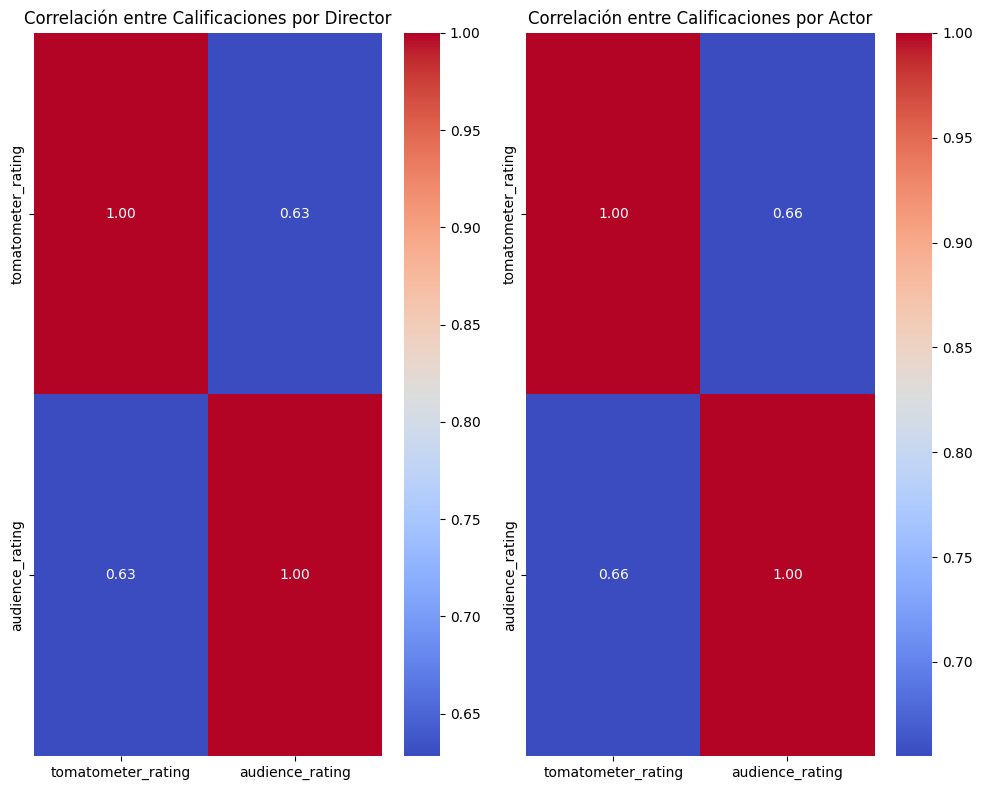

In [ ]:
director_ratings = movies.groupby('directors').agg({'tomatometer_rating': 'mean', 'audience_rating': 'mean'})
actor_ratings = movies.groupby('actors').agg({'tomatometer_rating': 'mean', 'audience_rating': 'mean'})
director_correlation = director_ratings.corr()
actor_correlation = actor_ratings.corr()

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.heatmap(director_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre Calificaciones por Director")

plt.subplot(1, 2, 2)
sns.heatmap(actor_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre Calificaciones por Actor")

plt.tight_layout()
plt.show()

Checar todas las carácterísticas de la película:
content_rating, genres, production_company
boxplot para ver tendencias


In [ ]:
movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'diferencia_calificaciones'],
      dtype='object')

In [ ]:
movies.directors

0                              Chris Columbus
1                           Nicole Holofcener
2                               Blake Edwards
3                                Sidney Lumet
4                           Richard Fleischer
                         ...                 
17707                             Luis Valdez
17708    Byron Howard, Rich Moore, Jared Bush
17709                                     NaN
17710             Cy Endfield, Cyril Endfield
17711                          Douglas Hickox
Name: directors, Length: 17407, dtype: object

## BoxPlots

In [ ]:
def create_overlapping_box_plots(data, x, y1, y2, title, xlabel, ylabel1, ylabel2, color1, color2):
    plt.figure(figsize=(12, 8))

    unique_vals = data[x].nunique()
    palette1 = create_gradient_palette(color1, unique_vals)
    palette2 = create_gradient_palette(color2, unique_vals)

    ax = sns.boxplot(x=x, y=y1, data=data, palette=palette1)
    ax.set_ylabel(ylabel1, color=color1)
    ax.tick_params(axis='x', labelrotation=90)

    ax2 = ax.twinx()
    sns.boxplot(x=x, y=y2, data=data, palette=palette2, ax=ax2)
    ax2.set_ylabel(ylabel2, color=color2)

    plt.title(title)
    plt.show()

In [ ]:
def create_comparative_box_plots(data, x, y1, y2, title, xlabel, ylabel, color1, color2):

    data_long = pd.melt(data, id_vars=[x], value_vars=[y1, y2],
                        var_name='Rating Type', value_name='Rating')

    plt.figure(figsize=(12, 8))
    sns.boxplot(x=x, y='Rating', hue='Rating Type', data=data_long,
                palette={y1: color1, y2: color2})
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.legend(title='Tipo de Calificación', loc='upper right')
    plt.gcf().patch.set_facecolor('#FCF7F8')
    plt.show()

In [ ]:
def create_box_plot(data, x, y, title, xlabel, ylabel, color):
    plt.figure(figsize=(12, 8))
    unique_vals = data[x].nunique()
    palette = create_gradient_palette(color, unique_vals)
    sns.boxplot(x=x, y=y, data=data, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
def create_gradient_palette(color, n_colors):
    return sns.light_palette(color, n_colors=n_colors, reverse=True)

In [ ]:
def get_top_n_diff(data, group_by, rating1, rating2, n):
    data['rating_diff'] = abs(data[rating1] - data[rating2])
    top_n = data.groupby(group_by)['rating_diff'].mean().nlargest(n).index
    return data[data[group_by].isin(top_n)]

<ipython-input-144-89761d33ede2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=palette)


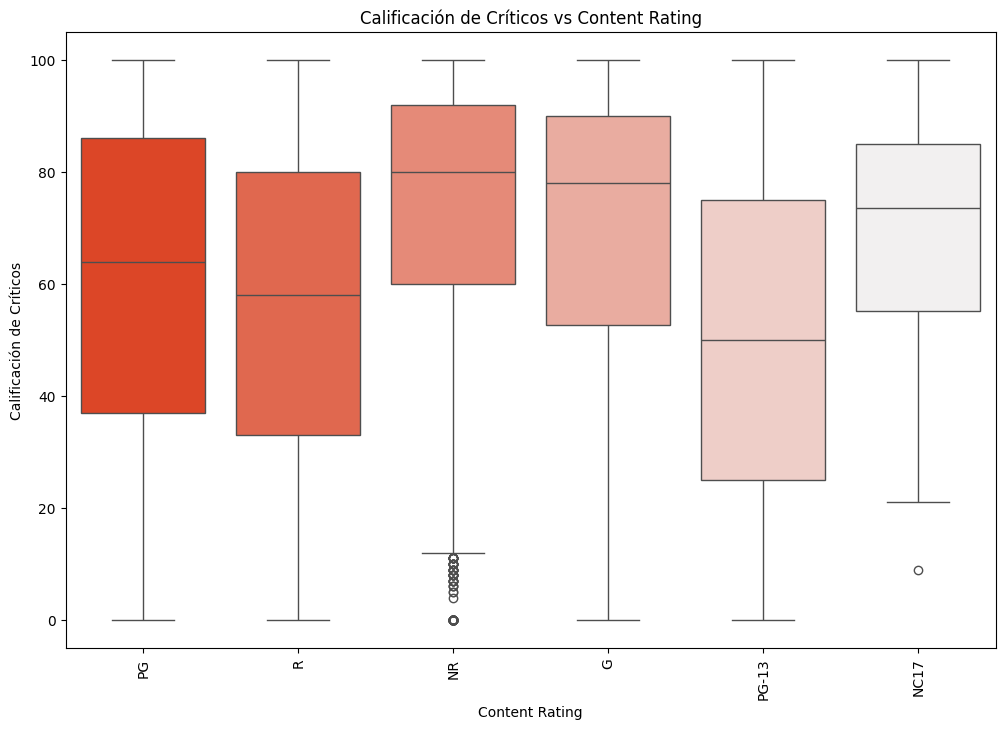

In [ ]:
create_box_plot(movies, 'content_rating', 'tomatometer_rating', 'Calificación de Críticos vs Content Rating', 'Content Rating', 'Calificación de Críticos', color_1)


<ipython-input-144-89761d33ede2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=palette)


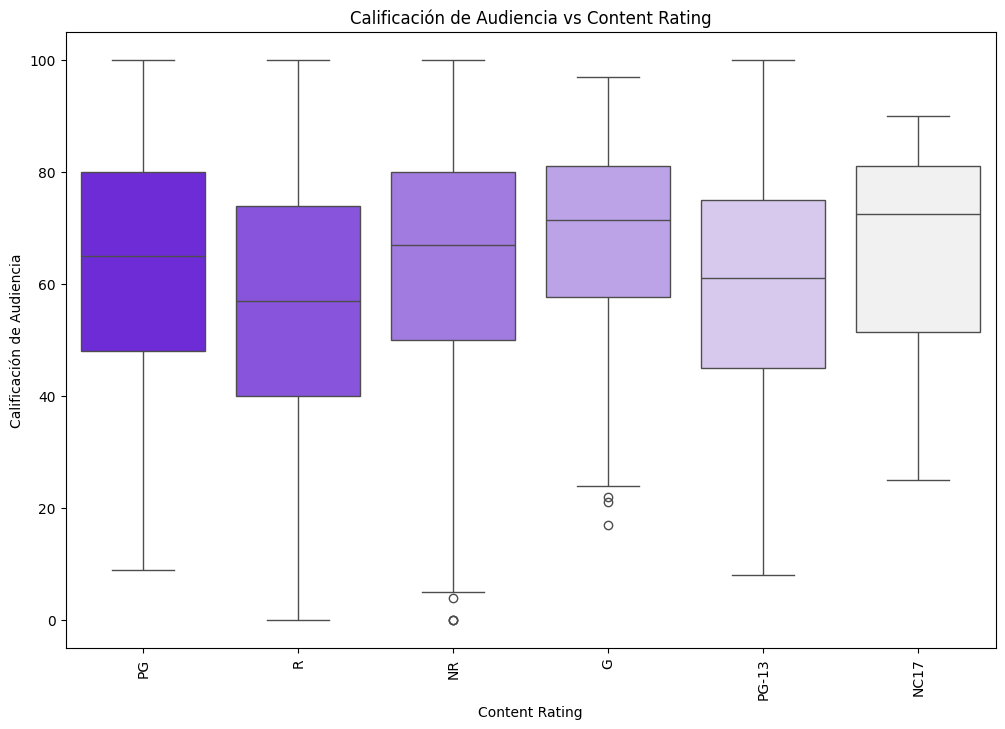

In [ ]:
create_box_plot(movies, 'content_rating', 'audience_rating', 'Calificación de Audiencia vs Content Rating', 'Content Rating', 'Calificación de Audiencia', color_2)


<ipython-input-142-5737aeb8cc8b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x, y=y1, data=data, palette=palette1)
<ipython-input-142-5737aeb8cc8b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y2, data=data, palette=palette2, ax=ax2)


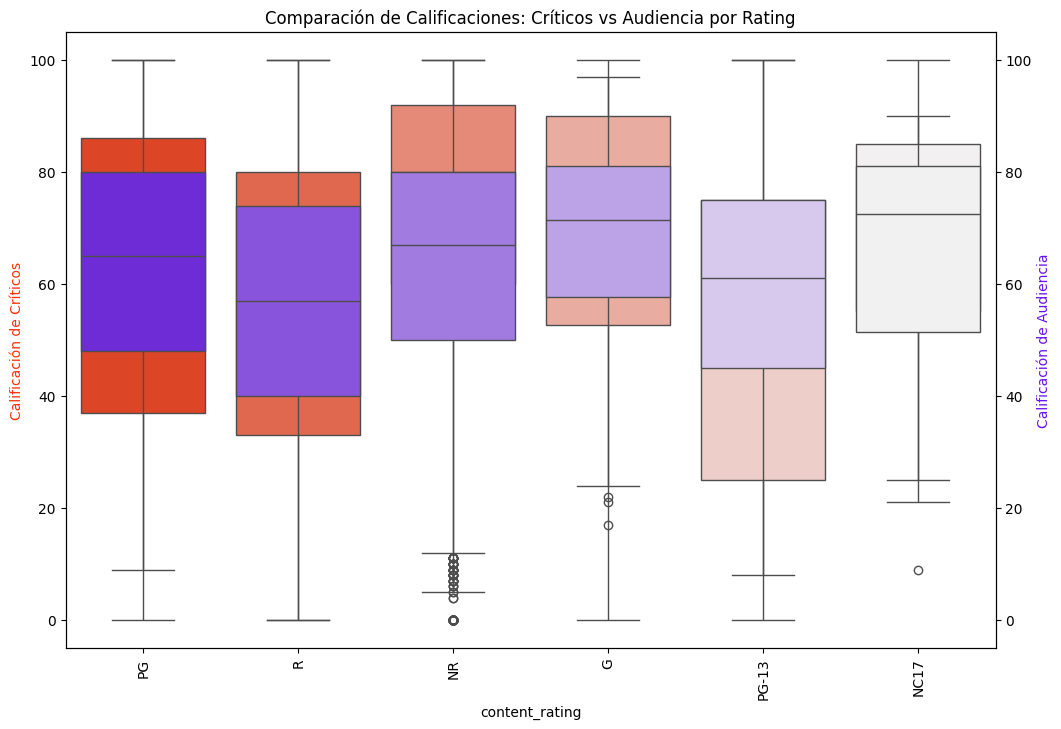

In [ ]:
create_overlapping_box_plots(
    movies,
    'content_rating',
    'tomatometer_rating',
    'audience_rating',
    'Comparación de Calificaciones: Críticos vs Audiencia por Rating',
    'Content Rating',
    'Calificación de Críticos',
    'Calificación de Audiencia',
    color_1,
    color_2
)

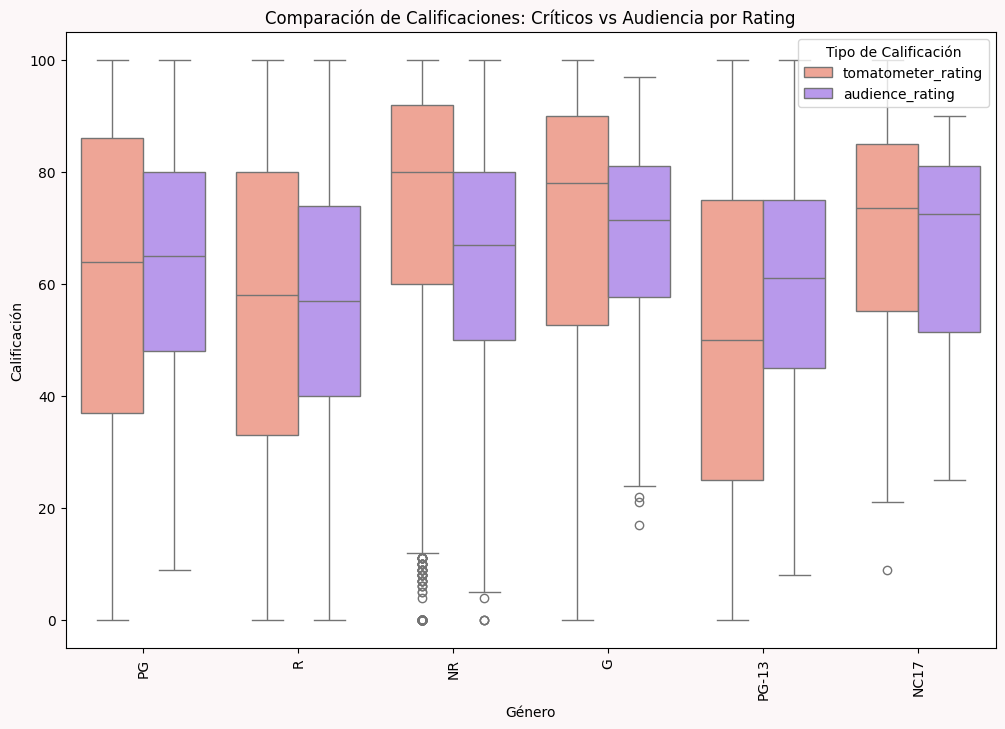

In [ ]:
create_comparative_box_plots(
    movies,
    'content_rating',
    'tomatometer_rating',
    'audience_rating',
    'Comparación de Calificaciones: Críticos vs Audiencia por Rating',
    'Género',
    'Calificación',
    color_1_2,
    color_2_2
)

<ipython-input-144-89761d33ede2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=palette)


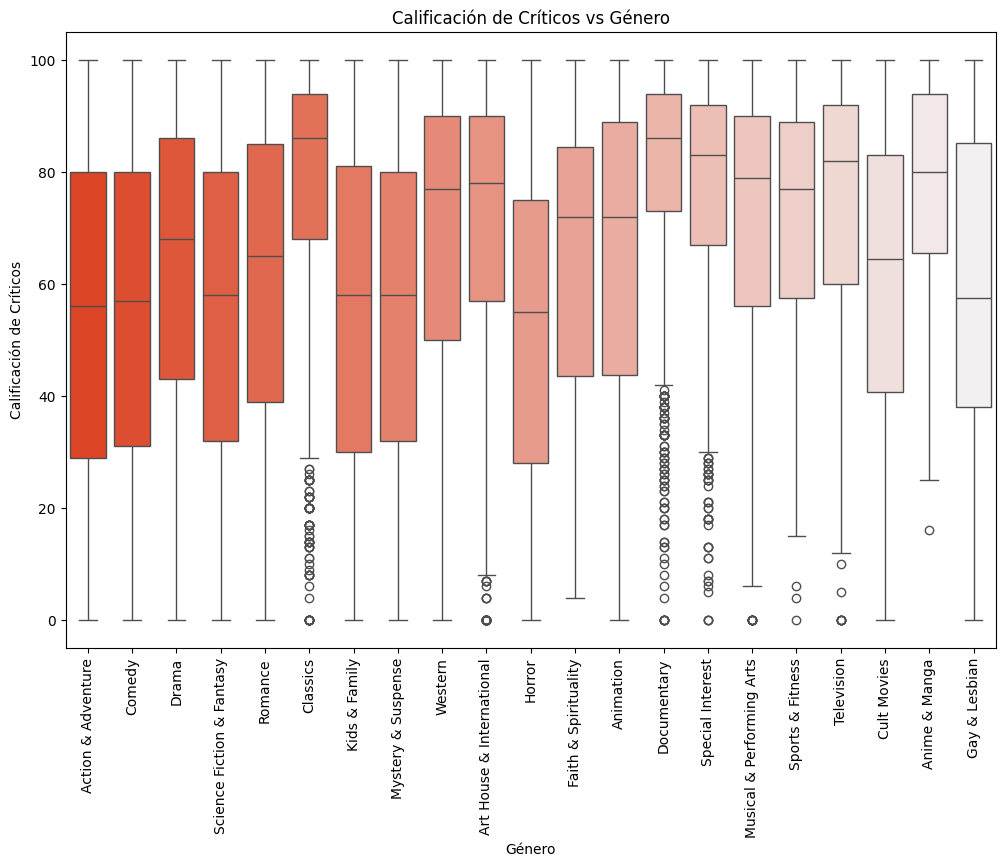

In [ ]:
movies_exploded = movies.assign(genres=movies['genres'].str.split(',')).explode('genres')
movies_exploded['genres'] = movies_exploded['genres'].str.strip()
movies_exploded = movies_exploded.reset_index(drop=True)

create_box_plot(movies_exploded, 'genres', 'tomatometer_rating', 'Calificación de Críticos vs Género', 'Género', 'Calificación de Críticos', color_1)


<ipython-input-144-89761d33ede2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=palette)


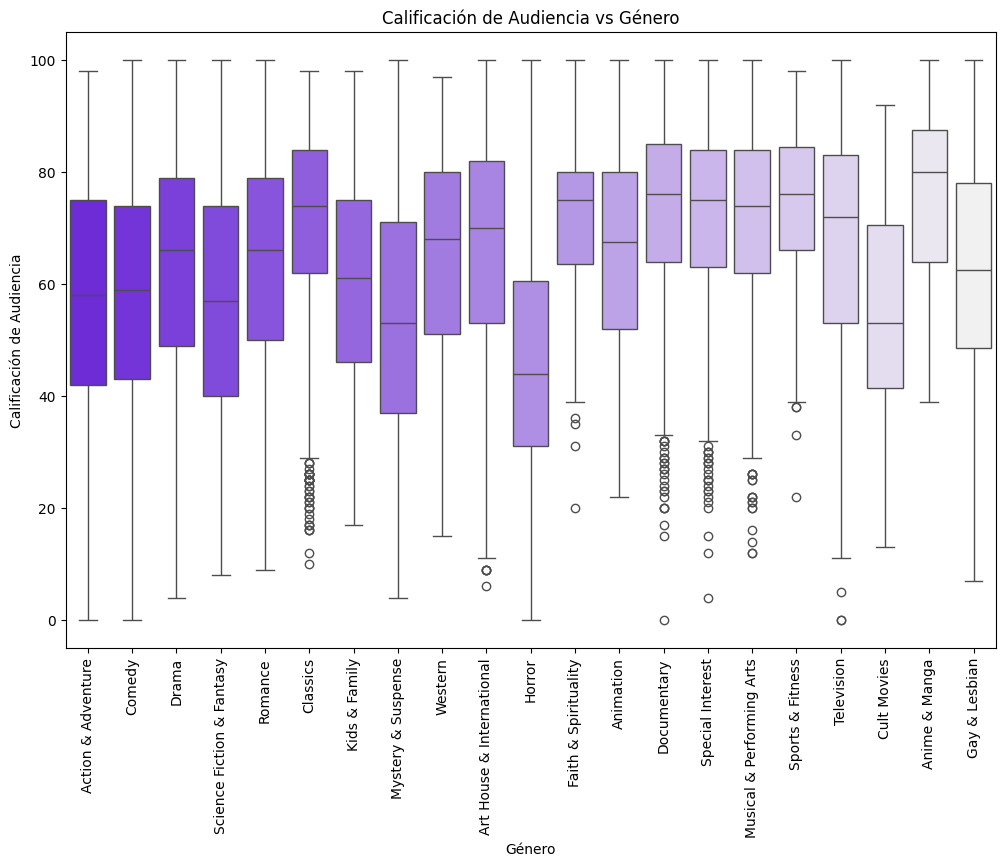

In [ ]:
create_box_plot(movies_exploded, 'genres', 'audience_rating', 'Calificación de Audiencia vs Género', 'Género', 'Calificación de Audiencia', color_2)

<ipython-input-142-5737aeb8cc8b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x, y=y1, data=data, palette=palette1)
<ipython-input-142-5737aeb8cc8b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y2, data=data, palette=palette2, ax=ax2)


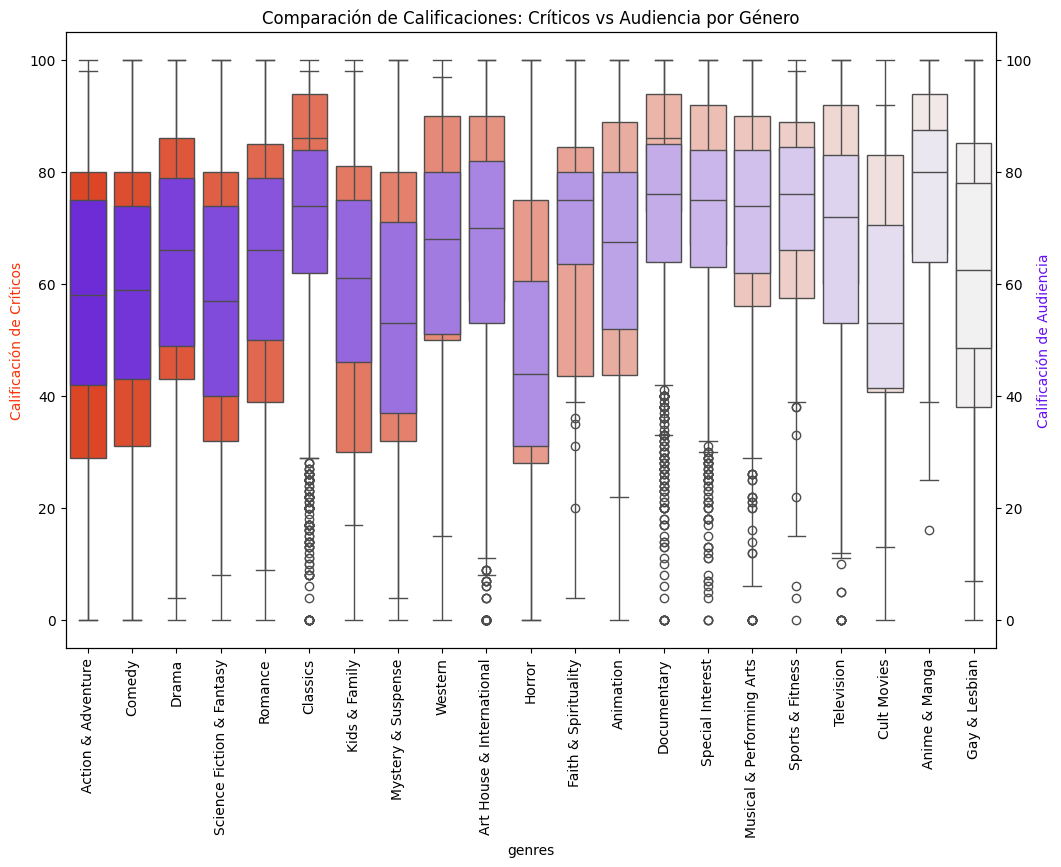

In [ ]:
create_overlapping_box_plots(
    movies_exploded,
    'genres',
    'tomatometer_rating',
    'audience_rating',
    'Comparación de Calificaciones: Críticos vs Audiencia por Género',
    'Género',
    'Calificación de Críticos',
    'Calificación de Audiencia',
    color_1,
    color_2
)

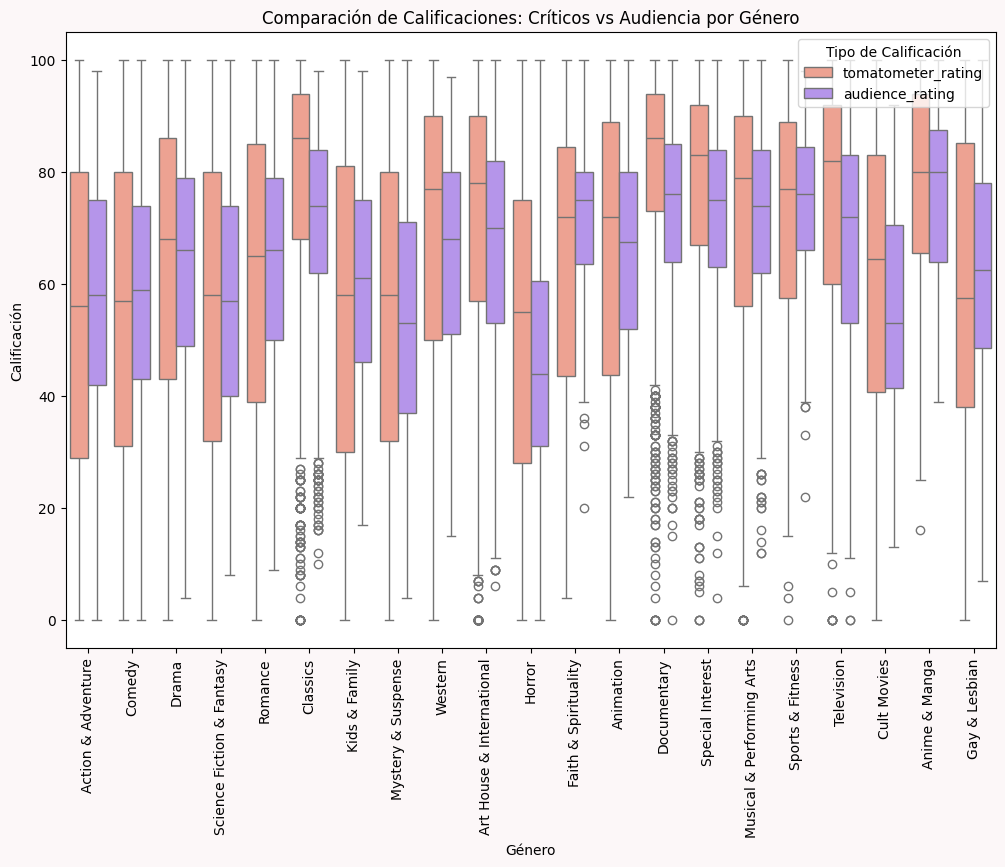

In [ ]:
create_comparative_box_plots(
    movies_exploded,
    'genres',
    'tomatometer_rating',
    'audience_rating',
    'Comparación de Calificaciones: Críticos vs Audiencia por Género',
    'Género',
    'Calificación',
    color_1_2,
    color_2_2
)

<ipython-input-144-89761d33ede2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=palette)


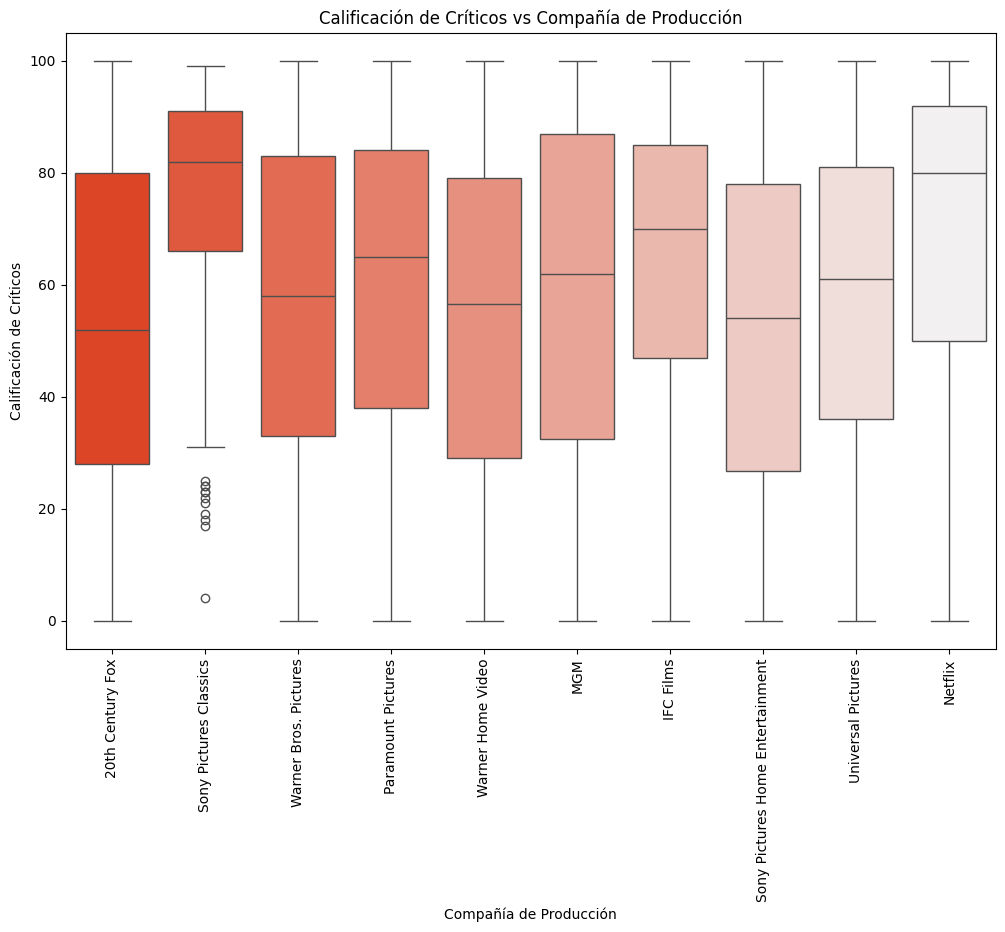

In [ ]:
top_production_companies = movies['production_company'].value_counts().nlargest(10).index
movies_top_production = movies[movies['production_company'].isin(top_production_companies)]

create_box_plot(movies_top_production, 'production_company', 'tomatometer_rating', 'Calificación de Críticos vs Compañía de Producción', 'Compañía de Producción', 'Calificación de Críticos', color_1)


<ipython-input-144-89761d33ede2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=palette)


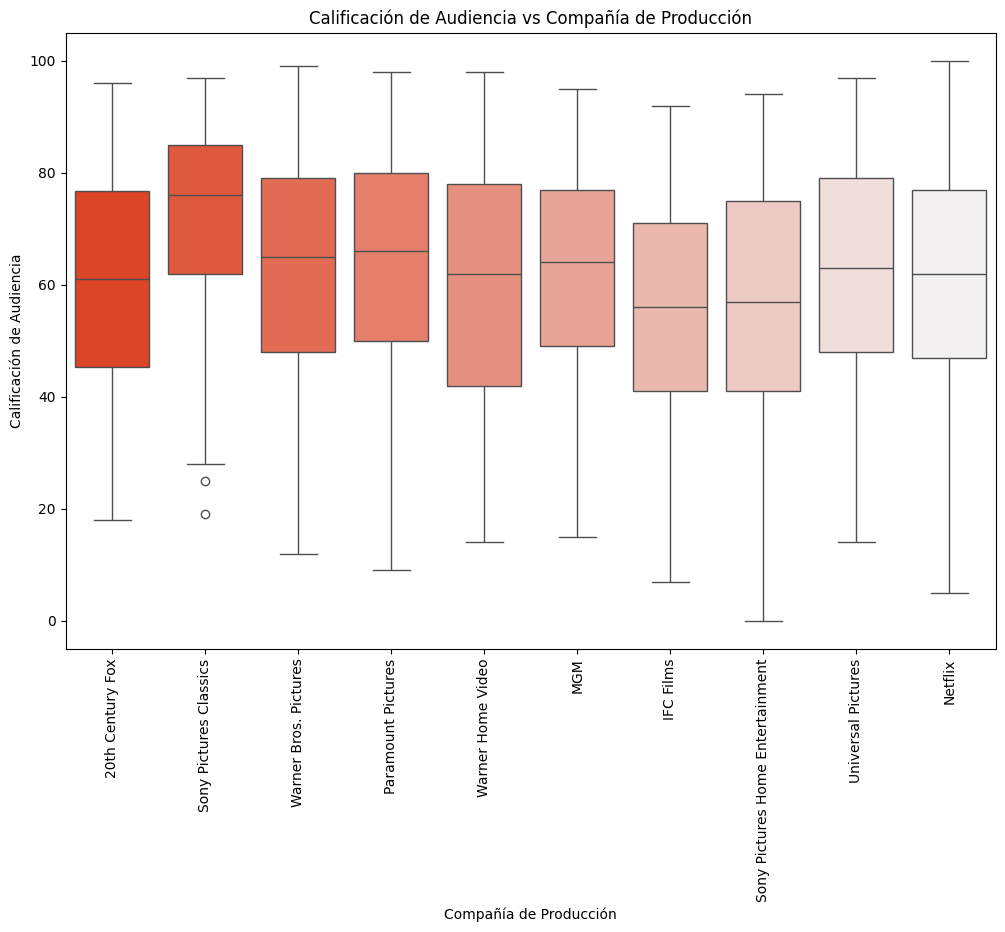

In [ ]:
create_box_plot(movies_top_production, 'production_company', 'audience_rating', 'Calificación de Audiencia vs Compañía de Producción', 'Compañía de Producción', 'Calificación de Audiencia', color_1)

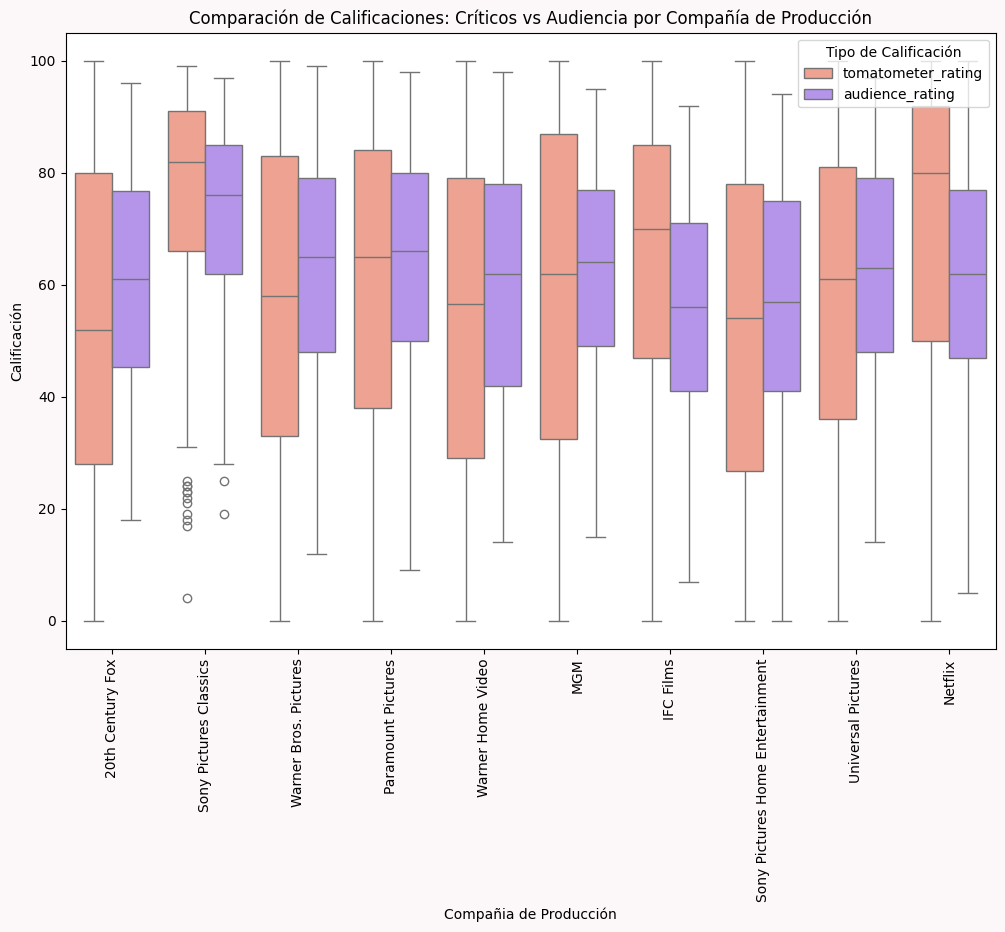

In [ ]:
create_comparative_box_plots(
    movies_top_production,
    'production_company',
    'tomatometer_rating',
    'audience_rating',
    'Comparación de Calificaciones: Críticos vs Audiencia por Compañía de Producción',
    'Compañia de Producción',
    'Calificación',
    color_1_2,
    color_2_2
)

<ipython-input-144-89761d33ede2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=palette)


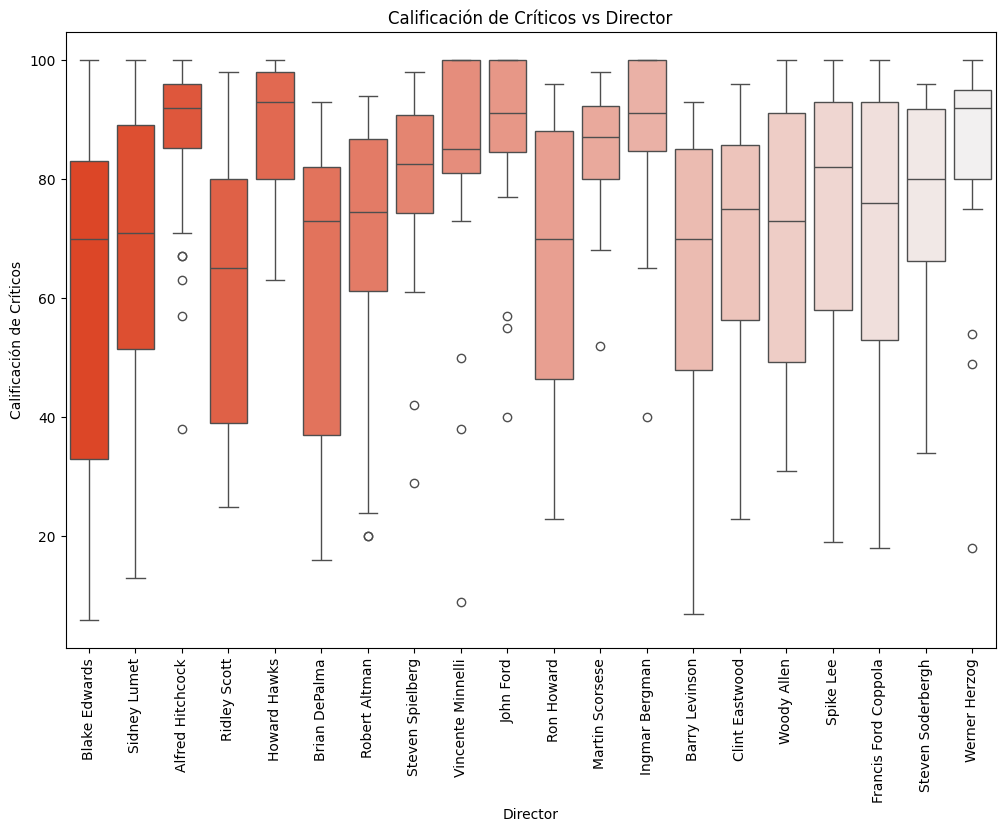

In [ ]:
top_directors = movies['directors'].value_counts().index[:20]
movies_filtered = movies[movies['directors'].isin(top_directors)]

create_box_plot(movies_filtered, 'directors', 'tomatometer_rating', 'Calificación de Críticos vs Director', 'Director', 'Calificación de Críticos', color_1)


<ipython-input-144-89761d33ede2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=palette)


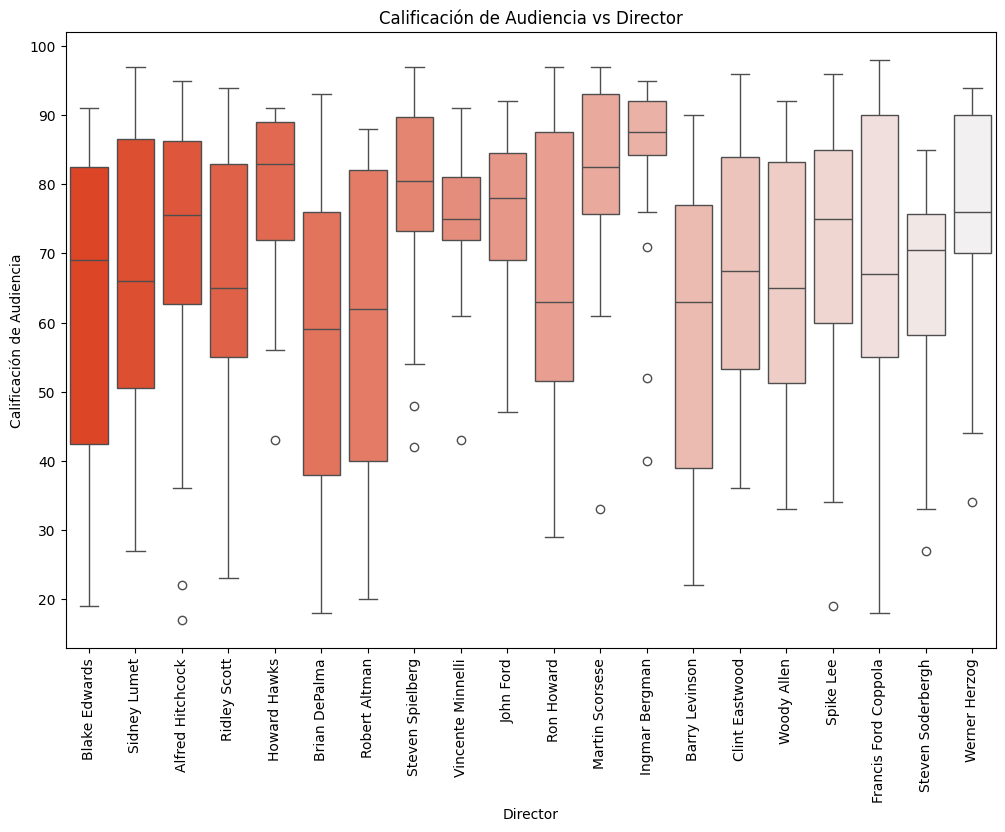

In [ ]:
create_box_plot(movies_filtered, 'directors', 'audience_rating', 'Calificación de Audiencia vs Director', 'Director', 'Calificación de Audiencia', color_1)

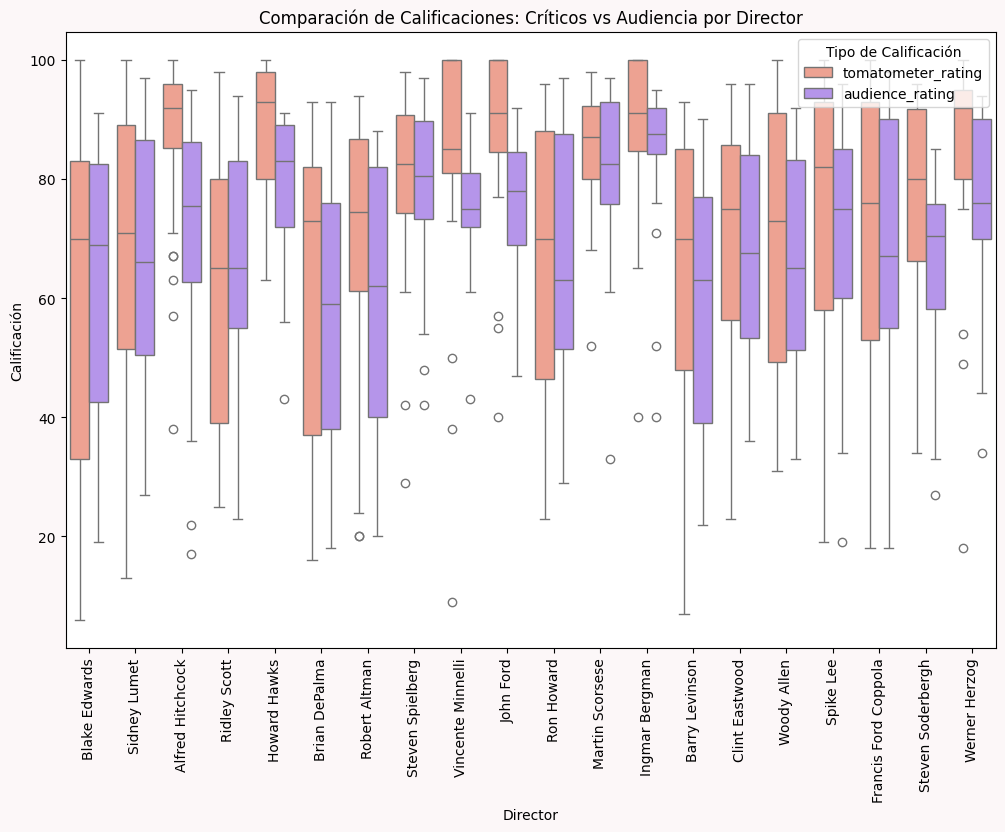

In [ ]:
create_comparative_box_plots(
    movies_filtered,
    'directors',
    'tomatometer_rating',
    'audience_rating',
    'Comparación de Calificaciones: Críticos vs Audiencia por Director',
    'Director',
    'Calificación',
    color_1_2,
    color_2_2
)

In [ ]:
movies_exploded = movies.assign(actors=movies['actors'].str.split(',')).explode('actors')
movies_exploded['actors'] = movies_exploded['actors'].str.strip()
movies_exploded = movies_exploded.reset_index(drop=True)

In [ ]:
top_actors = movies_exploded['actors'].value_counts().index[:50]
movies_filtered = movies_exploded[movies_exploded['actors'].isin(top_actors)]

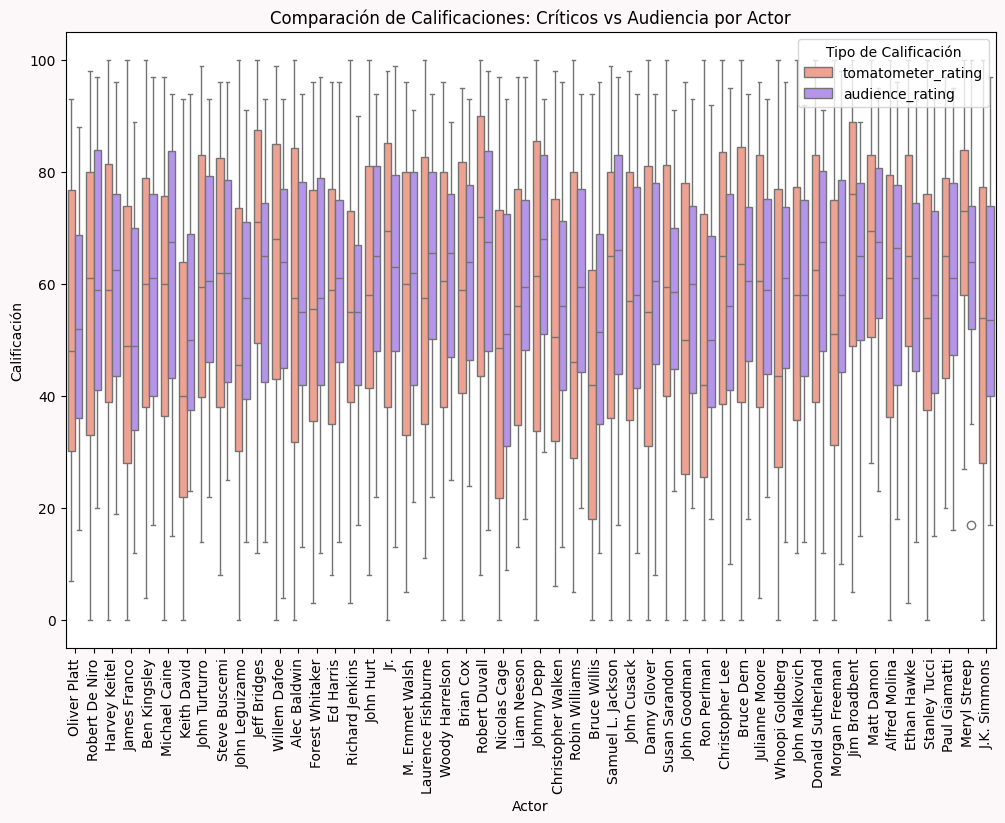

In [ ]:
create_comparative_box_plots(
    movies_filtered,
    'actors',
    'tomatometer_rating',
    'audience_rating',
    'Comparación de Calificaciones: Críticos vs Audiencia por Actor',
    'Actor',
    'Calificación',
    color_1_2,
    color_2_2
)

## HISTOGRAMAS



In [ ]:
def create_histograms(data, column1, column2, title1, title2, xlabel, ylabel, color1, color2):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[column1], kde=True, color=color1, bins=20)
    plt.title(title1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.subplot(1, 2, 2)
    sns.histplot(data[column2], kde=True, color=color2, bins=20)
    plt.title(title2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.tight_layout()
    plt.gcf().patch.set_facecolor('#FCF7F8')
    plt.show()

In [ ]:
movies_exploded = movies.assign(genres=movies['genres'].str.split(',')).explode('genres')
movies_exploded['genres'] = movies_exploded['genres'].str.strip()
horror_movies = movies_exploded[movies_exploded['genres'] == 'Horror']

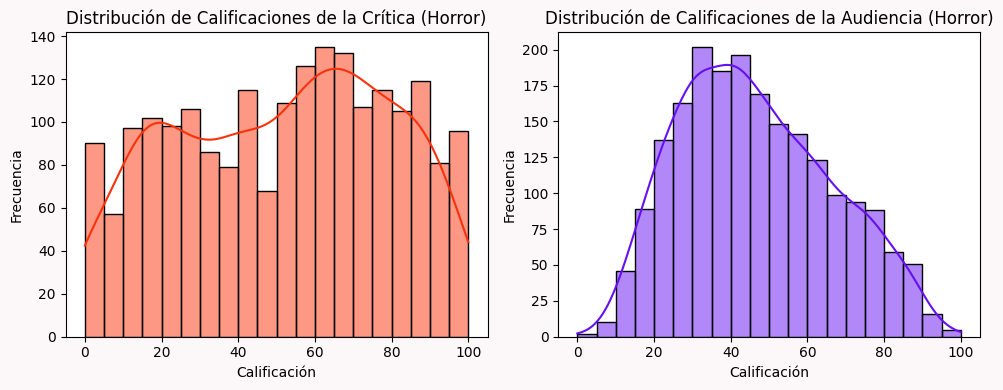

In [ ]:
create_histograms(
    horror_movies,
    'tomatometer_rating',
    'audience_rating',
    'Distribución de Calificaciones de la Crítica (Horror)',
    'Distribución de Calificaciones de la Audiencia (Horror)',
    'Calificación',
    'Frecuencia',
    color_1,
    color_2
)

In [ ]:
netflix_movies = movies[movies['production_company'].str.contains('Netflix', na=False)]

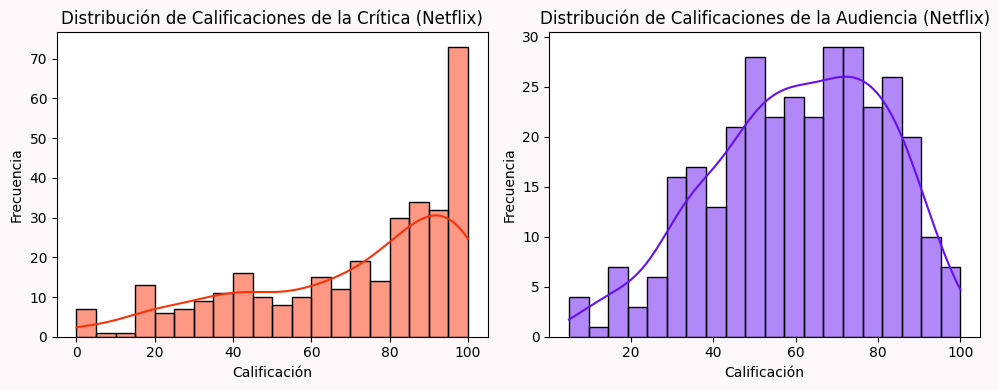

In [ ]:
create_histograms(
    netflix_movies,
    'tomatometer_rating',
    'audience_rating',
    'Distribución de Calificaciones de la Crítica (Netflix)',
    'Distribución de Calificaciones de la Audiencia (Netflix)',
    'Calificación',
    'Frecuencia',
    color_1,
    color_2
)

In [ ]:
fox_movies = movies[movies['production_company'].str.contains('20th Century Fox', na=False)]

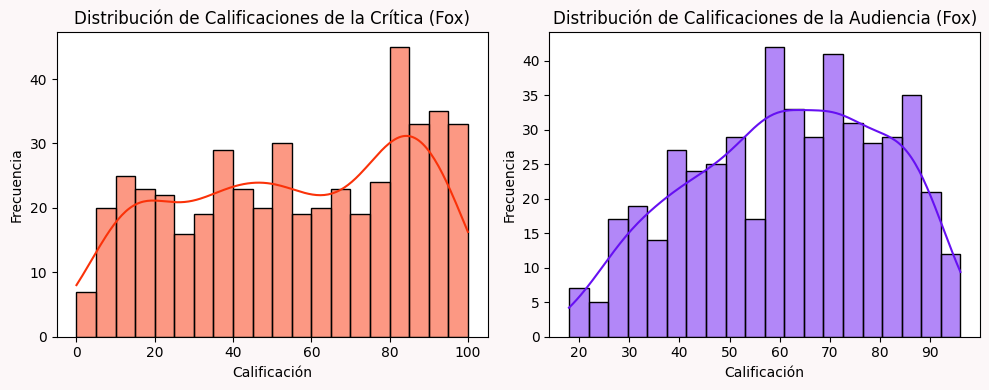

In [ ]:
create_histograms(
    fox_movies,
    'tomatometer_rating',
    'audience_rating',
    'Distribución de Calificaciones de la Crítica (Fox)',
    'Distribución de Calificaciones de la Audiencia (Fox)',
    'Calificación',
    'Frecuencia',
    color_1,
    color_2
)

In [ ]:
hitchcock_movies = movies[movies['directors'].str.contains('Alfred Hitchcock', na=False)]

eastwood_movies = movies[movies['directors'].str.contains('Clint Eastwood', na=False)]


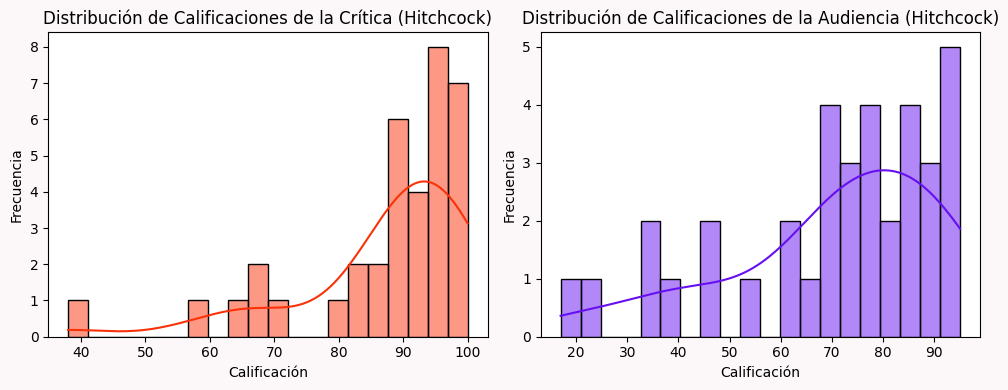

In [ ]:
create_histograms(
    hitchcock_movies,
    'tomatometer_rating',
    'audience_rating',
    'Distribución de Calificaciones de la Crítica (Hitchcock)',
    'Distribución de Calificaciones de la Audiencia (Hitchcock)',
    'Calificación',
    'Frecuencia',
    color_1,
    color_2
)

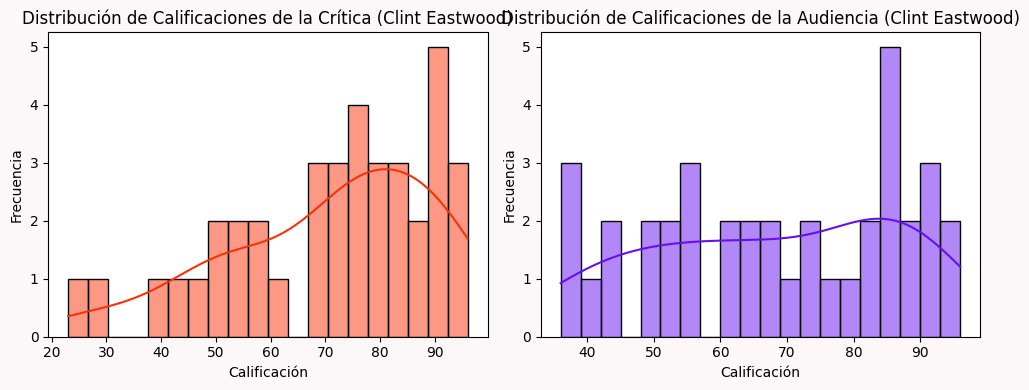

In [ ]:
create_histograms(
    eastwood_movies,
    'tomatometer_rating',
    'audience_rating',
    'Distribución de Calificaciones de la Crítica (Clint Eastwood)',
    'Distribución de Calificaciones de la Audiencia (Clint Eastwood)',
    'Calificación',
    'Frecuencia',
    color_1,
    color_2
)

In [ ]:
robin_movies = movies[movies['actors'].str.contains('Adam Sandler', na=False)]

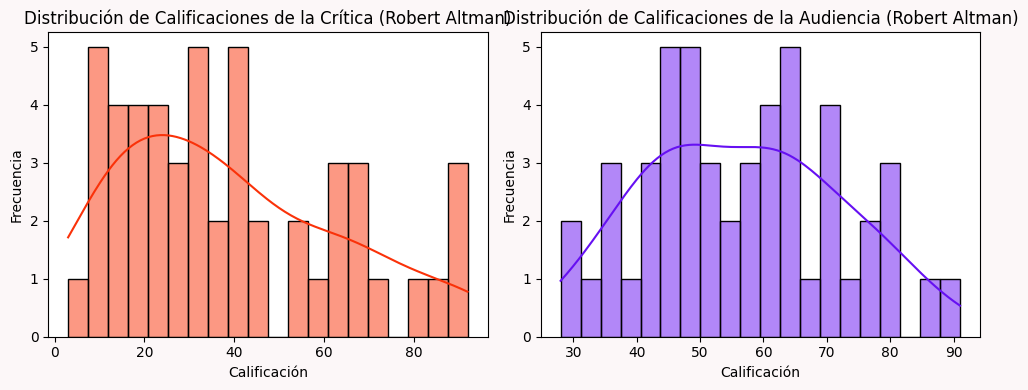

In [ ]:
create_histograms(
    robin_movies,
    'tomatometer_rating',
    'audience_rating',
    'Distribución de Calificaciones de la Crítica (Robert Altman)',
    'Distribución de Calificaciones de la Audiencia (Robert Altman)',
    'Calificación',
    'Frecuencia',
    color_1,
    color_2
)

netflix - mgm
hichcock

## 3.3 Elección de películas para análisis de texto

# 4. Text analysis